# Задача теории упругости. Плоская деформация.


In [6]:
from sympy import *
from sympy.plotting import plot3d
from IPython.display import display, Math

from fem_scheme import *  # не забыть!!!

In [7]:
init_printing() # инициализация "красивого" вывода

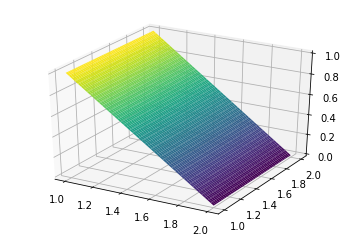

In [8]:
plot3d((1 - x) / 1 + 1, (x, 1, 2), (y, 1, 2))

## Задание кусочной функции $\varphi_{i}$

Символьные вражения базисной кусочной функции $\varphi_i=\varphi_i(x,y)$ храняться в виде питоновского словаря.
Также хранятся пределы интегрирования для каждой области $\Delta_{i}$

__важно__

В коде для удобства используются координаты $x$ и $y$ (и соотв. обозначения $x_k, y_k$), тогда как на бумаге и в некоторых заголовках: $x_1$ и $x_2$. 
Т.о. подразумевается $x = x_1, y = x_2$

In [9]:
phi = {
    'delta1': {
        'func': (x_k - x) / h + 1,
        'lim_x': (x, x_k, x_k + h),
        'lim_y': (y, y_k, x - x_k + y_k)
    },
    'delta2': {
        'func': 1 + (y_k - y) / h,
        'lim_x': (x, x_k, x_k + h),
        'lim_y': (y, x - x_k + y_k, y_k + h)
    },
    'delta3': {
        'func': (x - x_k) / h + (y_k - y) / h + 1,
        'lim_x': (x, x_k - h, x_k),
        'lim_y': (y, y_k, x + h - x_k + y_k)
    },
    'delta4': {
        'func': (x - x_k) / h + 1,
        'lim_x': (x, x_k - h, x_k),
        'lim_y': (y, x - x_k + y_k, y_k)
    },
    'delta5': {
        'func': (y - y_k) / h + 1,
        'lim_x': (x, x_k - h, x_k),
        'lim_y': (y, y_k - h, x - x_k + y_k)
    },
    'delta6': {
        'func': (x_k - x) / h + (y - y_k) / h + 1,
        'lim_x': (x, x_k, x_k + h),
        'lim_y': (y, x - h - x_k + y_k, y_k)
    }
}

## Вспомогательный код (определение функций)

- `get_integrand_func` - определяет вид подинтегральной функции, получает в качестве аргументов две функции $\varphi_i$ и список переменных по которым нужно дифференцированть - питоновский список с символьныйми переменными $x_1$ и $x_2$ (они же $x, y$)

- вспомогательная функция подготовки `prep_func`

- функция для вычисления интегралов `integrate_by_phi`. Возвращает словарь с символьным выражением интеграла с ответом (для вывода) и просто символьный ответ.

Структура данных для хранения пар функций $\varphi_{i}$ имеющих общую область. Является схемой вычислений и нужна для последующего интегрирования функций (точнее производные этих функций входят в подинтегральную функцию).
Так же храниться информация какие параметры нужно заменить (координаты узла $(x_k, y_k)$ соседней функции $\varphi_{ik}$ смещаются), хотя это не является необходимым, т.к. смещение линейное и на производную не влияет. 

```pairs = (
    {
        'first': {   
            'name': 'delta1',
            'subs': []
        },
        'second': {
            'name': 'delta3',
            'subs': [(x_k, x_k + h)]
        },
    },
    {
        'first': {   
            'name': 'delta6',
            'subs': []
        },
        'second': {
            'name': 'delta4',
            'subs': [(x_k, x_k + h)]
        },
    },
)
```

In [10]:
def get_integrand_func(f1, f2, diff_vars):
    # TODO: неявный порядок 
    return diff(f1, diff_vars[0]) * diff(f2, diff_vars[1])


def prep_func(pair, diff_vars):
    name_first = pair['first']['name']
    name_second = pair['second']['name']
    subs = pair['second']['subs']
    
    f1 = phi[name_first]['func']
    f2 = phi[name_second]['func']
    
    if subs:
        f2.subs(subs)
    
    # TODO: не самое лучшее решение
    func = get_integrand_func(f1, f2, diff_vars)
    
    lim_x = phi[name_first]['lim_x']
    lim_y = phi[name_first]['lim_y']

    return func, lim_x, lim_y


def integrate_by_phi(func, lim_x, lim_y):       
    I = Integral(func, lim_y, lim_x)
    res_int = simplify(
        integrate(func, lim_y, lim_x)
    )
    return {
        'int_expr': Eq(I, res_int),
        'int_ans': res_int 
    }

# варианты комбинаций частных производных входящих в итоговую систему
partial_diff_comb = [
    [x, x], [y, x], [y, y], [x, y]
]

## Вычисление всех интегралов

Здесь вычисляются все интегралы ао всем комбинациям частных производных.


порядок производных: [x, x]
self_self


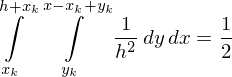

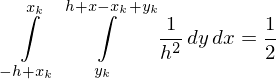

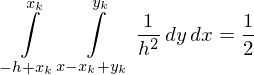

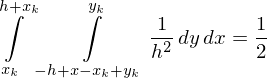

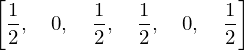

Integral result: 2
----------------------
right


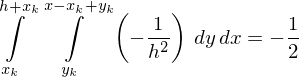

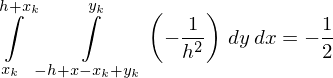

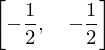

Integral result: -1
----------------------
right_top


Integral result: 0
----------------------
top


Integral result: 0
----------------------
left


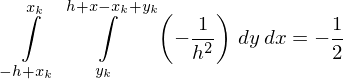

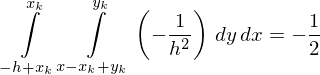

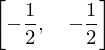

Integral result: -1
----------------------
left_bottom


Integral result: 0
----------------------
bottom


Integral result: 0
----------------------
порядок производных: [y, x]
self_self


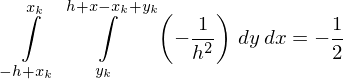

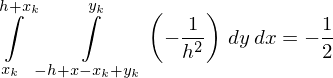

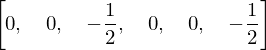

Integral result: -1
----------------------
right


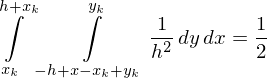

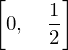

Integral result: 1/2
----------------------
right_top


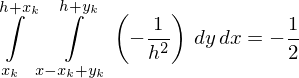

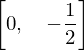

Integral result: -1/2
----------------------
top


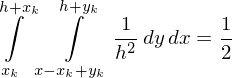

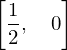

Integral result: 1/2
----------------------
left


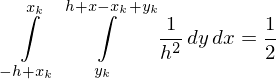

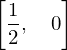

Integral result: 1/2
----------------------
left_bottom


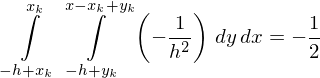

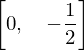

Integral result: -1/2
----------------------
bottom


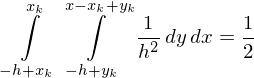

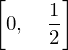

Integral result: 1/2
----------------------
порядок производных: [y, y]
self_self


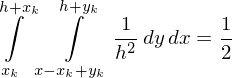

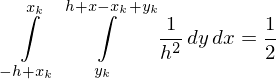

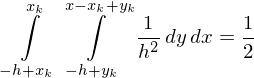

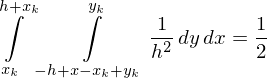

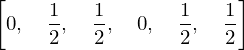

Integral result: 2
----------------------
right


Integral result: 0
----------------------
right_top


Integral result: 0
----------------------
top


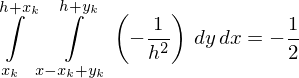

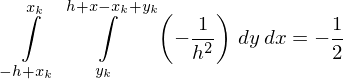

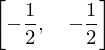

Integral result: -1
----------------------
left


Integral result: 0
----------------------
left_bottom


Integral result: 0
----------------------
bottom


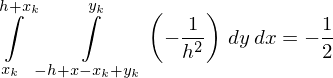

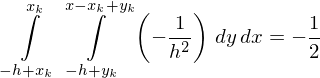

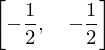

Integral result: -1
----------------------
порядок производных: [x, y]
self_self


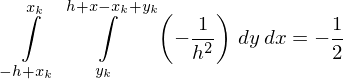

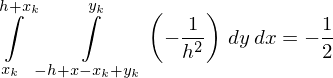

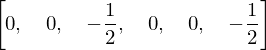

Integral result: -1
----------------------
right


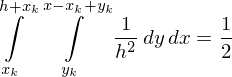

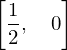

Integral result: 1/2
----------------------
right_top


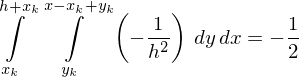

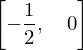

Integral result: -1/2
----------------------
top


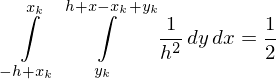

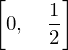

Integral result: 1/2
----------------------
left


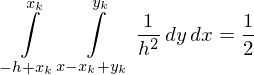

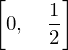

Integral result: 1/2
----------------------
left_bottom


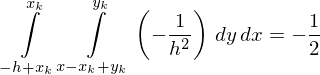

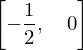

Integral result: -1/2
----------------------
bottom


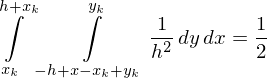

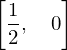

Integral result: 1/2
----------------------


In [11]:
for partial in partial_diff_comb:
    print(f'порядок производных: {partial}')

    for pairs_name in fem:
        print('='*35)
        print(pairs_name)
        pairs = fem[pairs_name]
        
        res = []    
        for pair in pairs:
            int_ = integrate_by_phi(
                *prep_func(pair, partial)
            )
            res.append(
                int_['int_ans']
            )
            display(int_['int_expr'])

        display(res)
        print(f'Integral result: {sum(res)}')
        print('-'*22)
    print('='*35)
